In [49]:
import tensorflow as tf
from tensorflow import keras


In [50]:
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [51]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [52]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [53]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [54]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [55]:
model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4751 - accuracy: 0.8298
Epoch 2/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.3587 - accuracy: 0.8676
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3589 - accuracy: 0.8675


In [56]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [57]:
layer_output=[layer.output for layer in model.layers]

In [58]:
model.input

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'flatten_10_input')>

In [59]:
keras.models.Model(inputs=model.input ,outputs=layer_output)

In [60]:
import tensorflow as ts

fmnist_data=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=fmnist_data.load_data()

In [61]:
training_images=training_images/255
test_images=test_images/255

In [62]:
model=keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(training_images,training_labels,epochs=5)


model.evaluate(test_images,test_labels)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4938 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3771 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3371 - accuracy: 0.8762
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3090 - accuracy: 0.8865
Epoch 5/5
313/313 [==============================] - 0s 703us/step - loss: 0.3400 - accuracy: 0.8796


[0.3399624824523926, 0.8795999884605408]

In [63]:
model_cnn=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation="sigmoid")
])

model_cnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_12 (Flatten)        (None, 800)               0         
                                                                 
 dense_22 (Dense)            (None, 128)             

In [64]:
model_cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_cnn.fit(training_images,training_labels,epochs=5)

model_cnn.evaluate(test_images,test_labels)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4762 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3267 - accuracy: 0.8805
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2812 - accuracy: 0.8961
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2495 - accuracy: 0.9074
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2721 - accuracy: 0.9028


[0.27205026149749756, 0.9028000235557556]

TypeError: 'module' object is not iterable

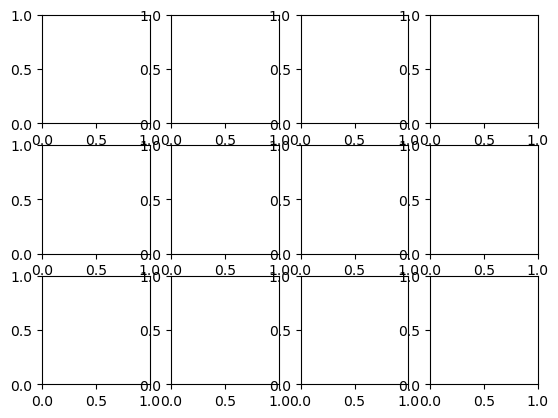

In [68]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs =  [layer.output for layer in model.layers]
print(layer_outputs)
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)
print(activation_model.summary())
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [69]:
from scipy import misc

In [70]:
ascent_image=misc.ascent()

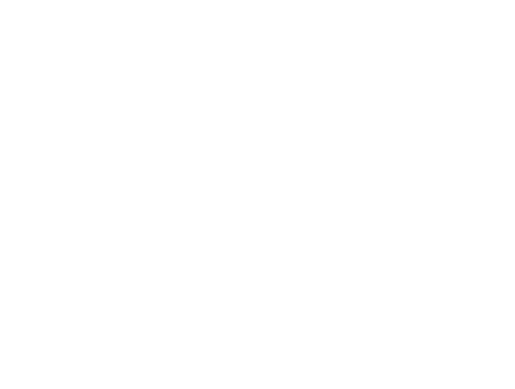

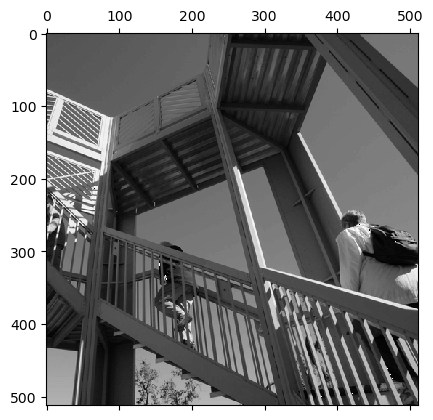

In [72]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.matshow(ascent_image)
plt.show()

In [73]:
import numpy as np
image_transform=np.copy(ascent_image)
size_x=image_transform.shape[0]
size_y=image_transform.shape[1]

In [74]:
filter=[[1,1,1],[1-8,1],[1,1,1]]
filter=[[1,1,1],[1-8,1],[1,1,1]]

In [78]:
weight =1

In [79]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
      convolution = convolution + (ascent_image[x-1, y] * filter[0][1])  
      convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])     
      convolution = convolution + (ascent_image[x, y-1] * filter[1][0])    
      convolution = convolution + (ascent_image[x, y] * filter[1][1])    
      convolution = convolution + (ascent_image[x, y+1] * filter[1][2])    
      convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])    
      convolution = convolution + (ascent_image[x+1, y] * filter[2][1])    
      convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])    
      
      # Multiply by weight
      convolution = convolution * weight   
      
      # Check the boundaries of the pixel values
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255

      # Load into the transformed image
      image_transform[x, y] = convolution

IndexError: list index out of range